<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2013/yolo_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 13.13 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# weights = '/content/gdrive/My Drive/Colab Notebooks/eva_files/yolo/yolov3.weights'
# woodydata = '/content/gdrive/My Drive/Colab Notebooks/eva_files/yolo/yolo_woody_detection'

In [0]:
import shutil

In [5]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [6]:
ls

gdrive/  sample_data/  YoloV3/


In [7]:
cd YoloV3/

/content/YoloV3


In [8]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [0]:
os.mkdir('weights')

In [10]:
shutil.copy('/content/gdrive/My Drive/Colab Notebooks/eva_files/yolo/yolov3-spp-ultralytics.pt','/content/YoloV3/weights')

'/content/YoloV3/weights/yolov3-spp-ultralytics.pt'

In [11]:
from distutils.dir_util import copy_tree
copy_tree('/content/gdrive/My Drive/Colab Notebooks/eva_files/yolo/yolo_woody_detection', '/content/YoloV3/data')

['/content/YoloV3/data/woodydata/woody.names',
 '/content/YoloV3/data/woodydata/woody.shapes',
 '/content/YoloV3/data/woodydata/woody.txt',
 '/content/YoloV3/data/woodydata/woody.data',
 '/content/YoloV3/data/woodydata/images/1.jpg',
 '/content/YoloV3/data/woodydata/images/2.jpg',
 '/content/YoloV3/data/woodydata/images/3.jpg',
 '/content/YoloV3/data/woodydata/images/4.jpg',
 '/content/YoloV3/data/woodydata/images/5.jpg',
 '/content/YoloV3/data/woodydata/images/6.jpg',
 '/content/YoloV3/data/woodydata/images/7.jpg',
 '/content/YoloV3/data/woodydata/images/8.jpg',
 '/content/YoloV3/data/woodydata/labels/1.txt',
 '/content/YoloV3/data/woodydata/labels/2.txt',
 '/content/YoloV3/data/woodydata/labels/3.txt',
 '/content/YoloV3/data/woodydata/labels/4.txt',
 '/content/YoloV3/data/woodydata/labels/5.txt',
 '/content/YoloV3/data/woodydata/labels/6.txt',
 '/content/YoloV3/data/woodydata/labels/7.txt',
 '/content/YoloV3/data/woodydata/labels/8.txt']

In [25]:
!ls

 annotation_tool   out_out	  results.png	    train_batch0.png
 cfg		   out_out2	  results.txt	    train.py
 data		   output	  runs		   'ubdivisions=1'
 detect.py	   __pycache__	  test_batch0.png   utils
 models.py	   README.md	  test.py	    vim.exe.stackdump
 out1_out	   results.json   ting		    weights


In [12]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-22 17:44:11.991994: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4842.47it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 109.11it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00,

In [14]:
!python train.py --data data/woodydata/woody.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/woodydata/woody.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-22 17:45:53.633148: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (8 found, 0 missing, 0 empty, 0 duplicate, for 8 images): 100% 8/8 [00:00<00:00, 4966.61it/s]
Caching images (0.0GB): 100% 8/8 [00:00<00:00, 67.17it/s]
Caching labels (8 found, 0 missing, 0 empty, 0 duplicate, for 8 images): 100% 8/8 [00:00<00:00, 5096.3

In [19]:
!python detect.py --conf-thres 0.1 --output out_out2 --names data/woodydata/woody.names --source data/woodydata/images

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/woodydata/woody.names', output='out_out2', save_txt=False, source='data/woodydata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/8 data/woodydata/images/1.jpg: 512x384 1 woodys, Done. (0.022s)
image 2/8 data/woodydata/images/2.jpg: 512x384 1 woodys, Done. (0.018s)
image 3/8 data/woodydata/images/3.jpg: 384x512 1 woodys, Done. (0.020s)
image 4/8 data/woodydata/images/4.jpg: 512x384 1 woodys, Done. (0.021s)
image 5/8 data/woodydata/images/5.jpg: 512x512 3 woodys, Done. (0.025s)
image 6/8 data/woodydata/images/6.jpg: 320x512 1 woodys, Done. (0.019s)
image 7/8 data/woodydata/images/7.jpg: 512x320 1 woodys, Done. (0.023s)
image 8/8 dat

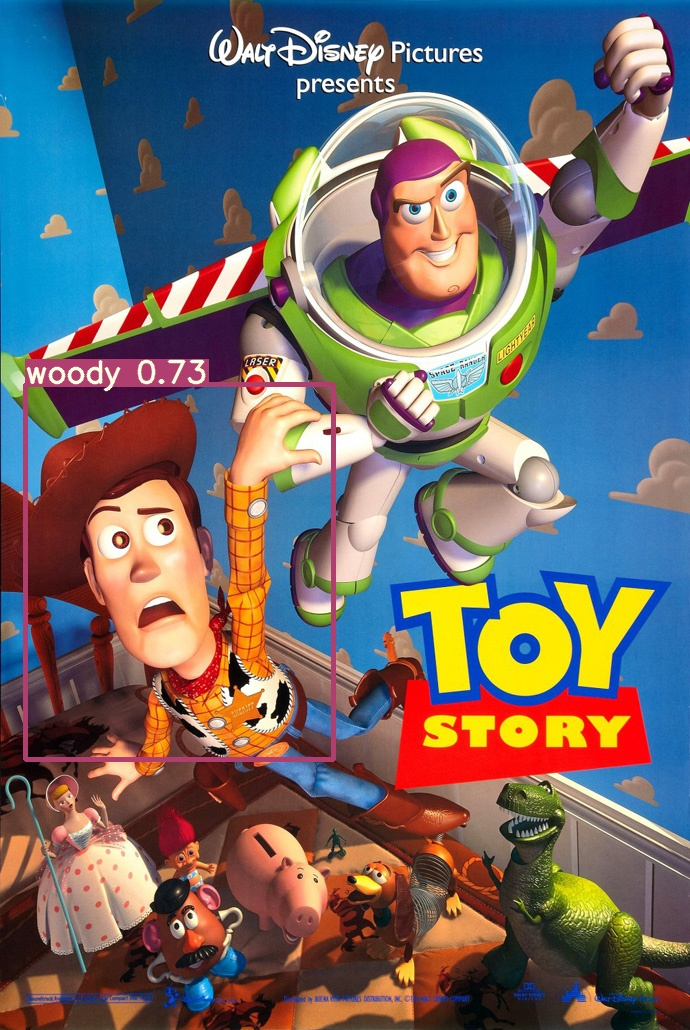

In [20]:
Image(filename='out_out2/1.jpg', width=600)

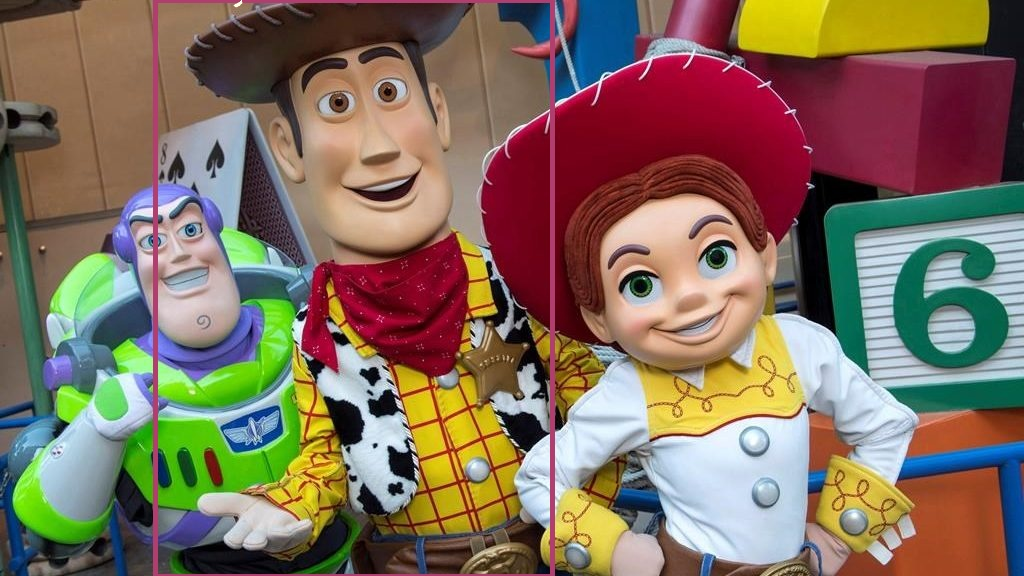

In [24]:
Image(filename='out_out2/6.jpg', width=600)

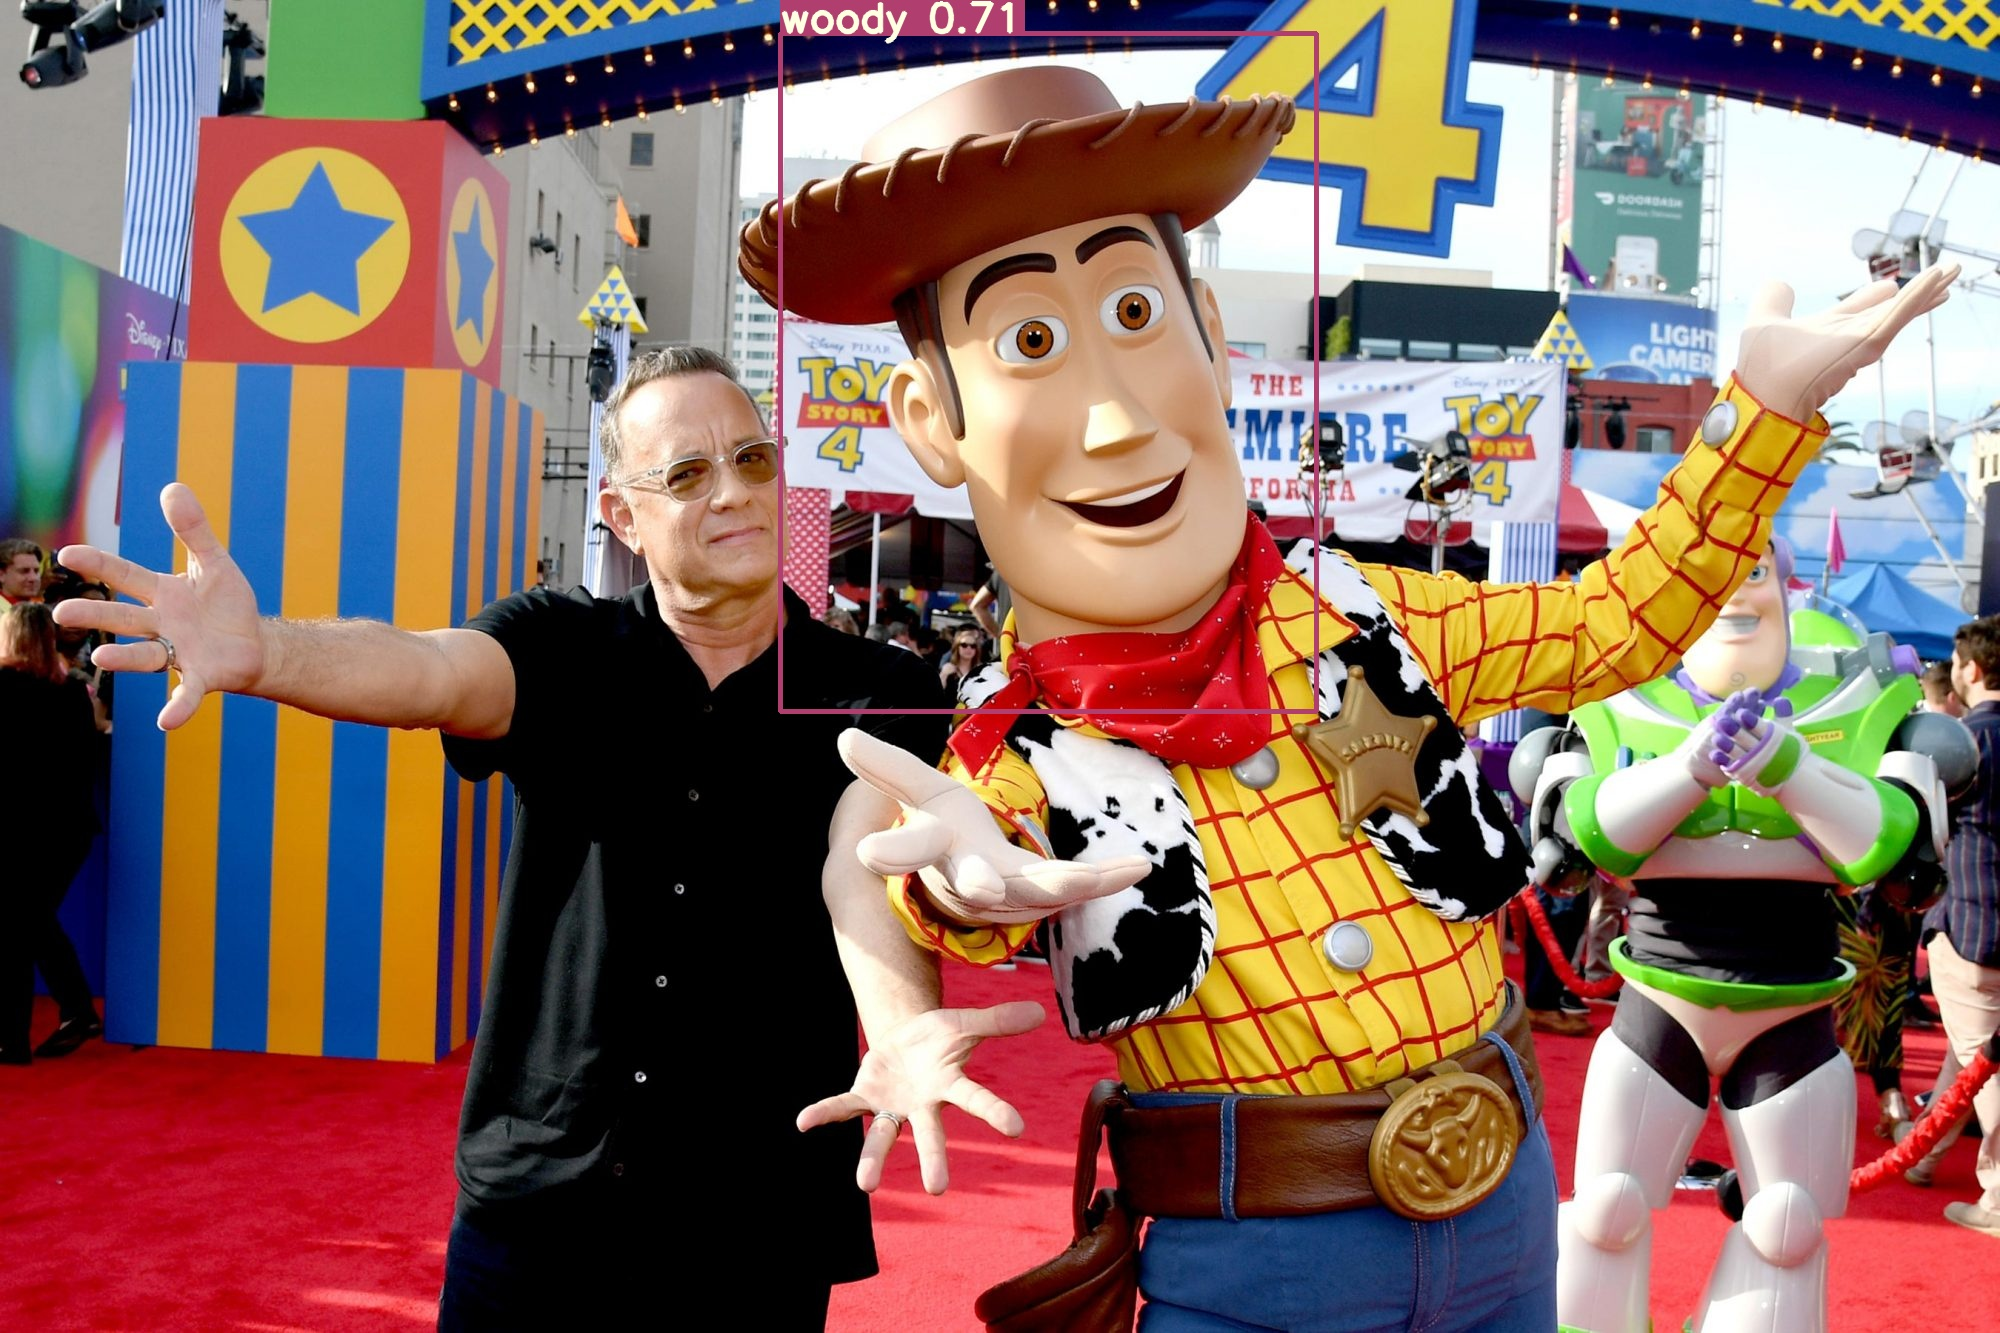

In [22]:
Image(filename='out_out2/3.jpg', width=600)

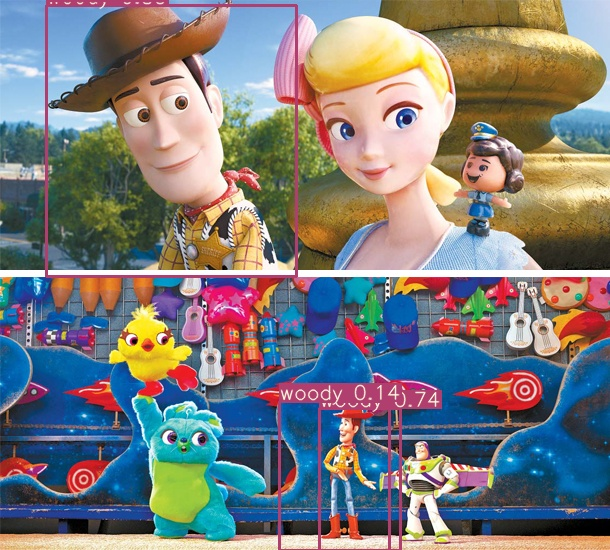

In [23]:
Image(filename='out_out2/5.jpg', width=600)